# Package Import

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector

from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay,f1_score,accuracy_score
from sklearn.exceptions import NotFittedError

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

import tensorflow as tf

sns.set_style('darkgrid')

%matplotlib inline

# Data Import

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nehaprabhavalkar/av-healthcare-analytics-ii")

print("Path to dataset files:", path)

input_file=path + '/healthcare/train_data_dictionary.csv'
df_des=pd.read_csv(input_file)
df_des

Path to dataset files: /Users/markmerkouchev/.cache/kagglehub/datasets/nehaprabhavalkar/av-healthcare-analytics-ii/versions/1


,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [13]:
input_file= path + '/healthcare/train_data.csv'
df=pd.read_csv(input_file)
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [14]:
target='Stay'
target

'Stay'

In [15]:
col_drop_list=[]
col_drop_list.append('patientid')

# EDA (Describe,Info)

In [16]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# Null Check

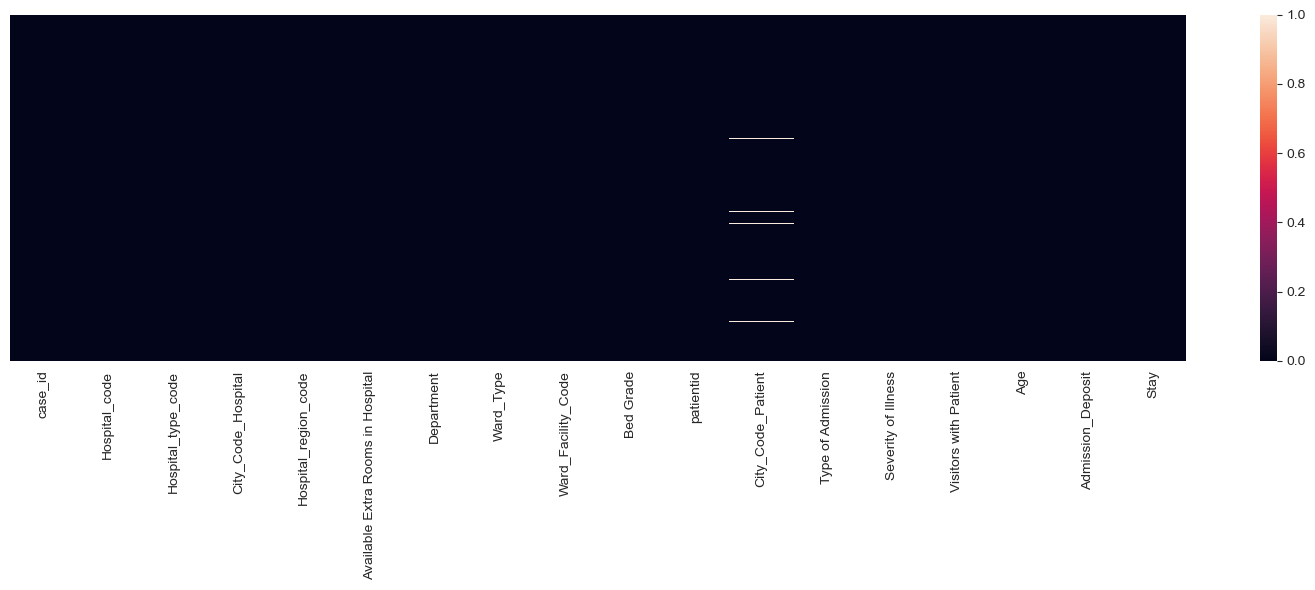

In [18]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isna(),yticklabels=False)
plt.tight_layout()

In [19]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [20]:
df=df.dropna()

In [21]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  object 
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility_Code                 313793 non-null  object 
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  313793 no

# Duplicate Check

In [23]:
# df=df.drop_duplicates()

In [24]:
# df.info()

# Feature Investigation

In [25]:
df.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313793 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            313793 non-null  int64  
 1   Hospital_code                      313793 non-null  int64  
 2   Hospital_type_code                 313793 non-null  object 
 3   City_Code_Hospital                 313793 non-null  int64  
 4   Hospital_region_code               313793 non-null  object 
 5   Available Extra Rooms in Hospital  313793 non-null  int64  
 6   Department                         313793 non-null  object 
 7   Ward_Type                          313793 non-null  object 
 8   Ward_Facility_Code                 313793 non-null  object 
 9   Bed Grade                          313793 non-null  float64
 10  patientid                          313793 non-null  int64  
 11  City_Code_Patient                  313793 no

In [27]:
for col in df.columns:
    print("-"*80)
    print(df[col].value_counts())
print("-"*80)

--------------------------------------------------------------------------------
case_id
1         1
211830    1
211837    1
211836    1
211835    1
         ..
105690    1
105689    1
105688    1
105687    1
318438    1
Name: count, Length: 313793, dtype: int64
--------------------------------------------------------------------------------
Hospital_code
26    32681
23    26112
19    21035
6     20016
11    17107
28    16947
14    16917
27    14109
9     11381
12    11149
29    11092
32    10561
25     9642
10     9271
15     9134
21     8047
24     7835
3      7030
17     5373
1      5188
13     5178
5      5143
2      5050
30     4917
22     4237
31     3932
16     3631
8      3611
18     3592
20     1390
7      1269
4      1216
Name: count, dtype: int64
--------------------------------------------------------------------------------
Hospital_type_code
a    141071
b     68125
c     45352
e     24286
d     20161
f     10561
g      4237
Name: count, dtype: int64
----------------------

**Target unique values**

In [28]:
df[target].nunique()

11

In [29]:
col_drop_list.append('case_id')
col_drop_list

['patientid', 'case_id']

# Col drop

In [30]:
df=df.drop(col_drop_list,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313793 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      313793 non-null  int64  
 1   Hospital_type_code                 313793 non-null  object 
 2   City_Code_Hospital                 313793 non-null  int64  
 3   Hospital_region_code               313793 non-null  object 
 4   Available Extra Rooms in Hospital  313793 non-null  int64  
 5   Department                         313793 non-null  object 
 6   Ward_Type                          313793 non-null  object 
 7   Ward_Facility_Code                 313793 non-null  object 
 8   Bed Grade                          313793 non-null  float64
 9   City_Code_Patient                  313793 non-null  float64
 10  Type of Admission                  313793 non-null  object 
 11  Severity of Illness                313793 no

# EDA Corr

In [31]:
#plt.figure(figsize=(20,8))
#sns.heatmap(df.corr(),cmap='cividis',annot=True)
#plt.tight_layout()

# Feature Transformation & Segregation

In [32]:
def feature_type_transform(df,col_list,col_type):
    for col in col_list:
        df[col]=df[col].astype(col_type)
    return df

In [33]:
def col_unique_val_check(df):
    for i,col in enumerate(df.columns):
        print(f"{col:40} ----> {df[col].nunique():10} unique values   with dtype {str(df[col].dtype):10} at index {i}")  

In [34]:
def num_col_unique_val_check(df,target):
    for i,col in enumerate(df.select_dtypes(exclude='object')):
        if(col!=target):
            print(f"{col:40} ----> {df[col].nunique():10} unique values   with dtype {str(df[col].dtype):10}")

**Check Unique val**

In [35]:
col_unique_val_check(df)

Hospital_code                            ---->         32 unique values   with dtype int64      at index 0
Hospital_type_code                       ---->          7 unique values   with dtype object     at index 1
City_Code_Hospital                       ---->         11 unique values   with dtype int64      at index 2
Hospital_region_code                     ---->          3 unique values   with dtype object     at index 3
Available Extra Rooms in Hospital        ---->         18 unique values   with dtype int64      at index 4
Department                               ---->          5 unique values   with dtype object     at index 5
Ward_Type                                ---->          6 unique values   with dtype object     at index 6
Ward_Facility_Code                       ---->          6 unique values   with dtype object     at index 7
Bed Grade                                ---->          4 unique values   with dtype float64    at index 8
City_Code_Patient                    

In [36]:
num_col_unique_val_check(df,target)

Hospital_code                            ---->         32 unique values   with dtype int64     
City_Code_Hospital                       ---->         11 unique values   with dtype int64     
Available Extra Rooms in Hospital        ---->         18 unique values   with dtype int64     
Bed Grade                                ---->          4 unique values   with dtype float64   
City_Code_Patient                        ---->         37 unique values   with dtype float64   
Visitors with Patient                    ---->         28 unique values   with dtype int64     
Admission_Deposit                        ---->       7283 unique values   with dtype float64   


## **Cat col creation**

In [37]:
cat_col=[]
for col in df.select_dtypes(include='object'):
    if(df[col].nunique()<30 and col!=target):
        print(f"{col:30} ----> {df[col].nunique():10} unique values")
        cat_col.append(col)

Hospital_type_code             ---->          7 unique values
Hospital_region_code           ---->          3 unique values
Department                     ---->          5 unique values
Ward_Type                      ---->          6 unique values
Ward_Facility_Code             ---->          6 unique values
Type of Admission              ---->          3 unique values
Severity of Illness            ---->          3 unique values
Age                            ---->         10 unique values


## **Num cat col creation**

In [38]:
num_cat_col=[]
for col in df.select_dtypes(exclude='object'):
    if(df[col].nunique()<40 and col!=target):
        print(f"{col:40} ----> {df[col].nunique():10} unique values")
        num_cat_col.append(col)

Hospital_code                            ---->         32 unique values
City_Code_Hospital                       ---->         11 unique values
Available Extra Rooms in Hospital        ---->         18 unique values
Bed Grade                                ---->          4 unique values
City_Code_Patient                        ---->         37 unique values
Visitors with Patient                    ---->         28 unique values


## **Num col creation**

In [39]:
num_col=['Admission_Deposit']
print(f"{num_col[0]:40} ----> {df[num_col[0]].nunique():10} unique values")

Admission_Deposit                        ---->       7283 unique values


**Feature type transform**

In [40]:
df=feature_type_transform(df,num_cat_col,'int64')

In [41]:
num_col_unique_val_check(df,target)

Hospital_code                            ---->         32 unique values   with dtype int64     
City_Code_Hospital                       ---->         11 unique values   with dtype int64     
Available Extra Rooms in Hospital        ---->         18 unique values   with dtype int64     
Bed Grade                                ---->          4 unique values   with dtype int64     
City_Code_Patient                        ---->         37 unique values   with dtype int64     
Visitors with Patient                    ---->         28 unique values   with dtype int64     
Admission_Deposit                        ---->       7283 unique values   with dtype float64   


In [42]:
print(df.columns.values)

['Hospital_code' 'Hospital_type_code' 'City_Code_Hospital'
 'Hospital_region_code' 'Available Extra Rooms in Hospital' 'Department'
 'Ward_Type' 'Ward_Facility_Code' 'Bed Grade' 'City_Code_Patient'
 'Type of Admission' 'Severity of Illness' 'Visitors with Patient' 'Age'
 'Admission_Deposit' 'Stay']


In [43]:
print(cat_col,"\n",num_cat_col,"\n",num_col)

['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age'] 
 ['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient'] 
 ['Admission_Deposit']


In [44]:
len(df.columns)

16

In [45]:
len(cat_col),len(num_cat_col),len(num_col),[len(cat_col)+len(num_cat_col)+len(num_col)]

(8, 6, 1, [15])

# EDA

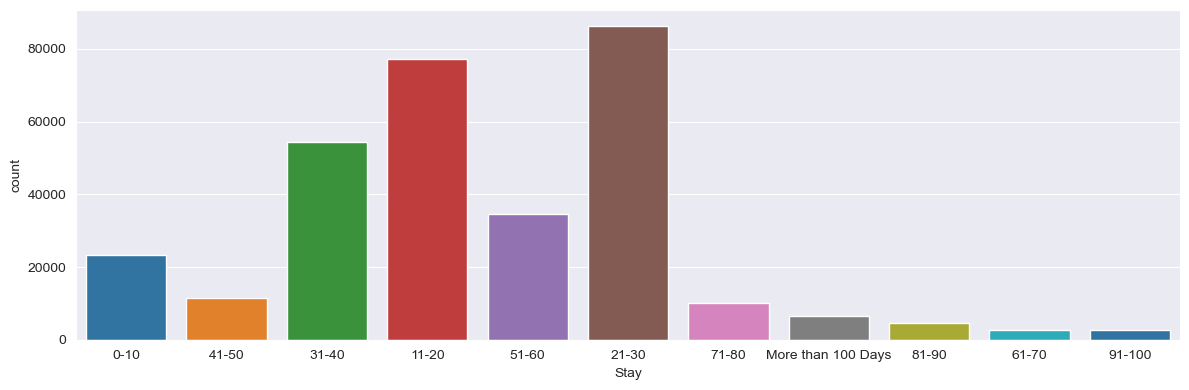

In [46]:
plt.figure(figsize=(12,4))
sns.countplot(x=target,data=df,palette='tab10')
plt.tight_layout()

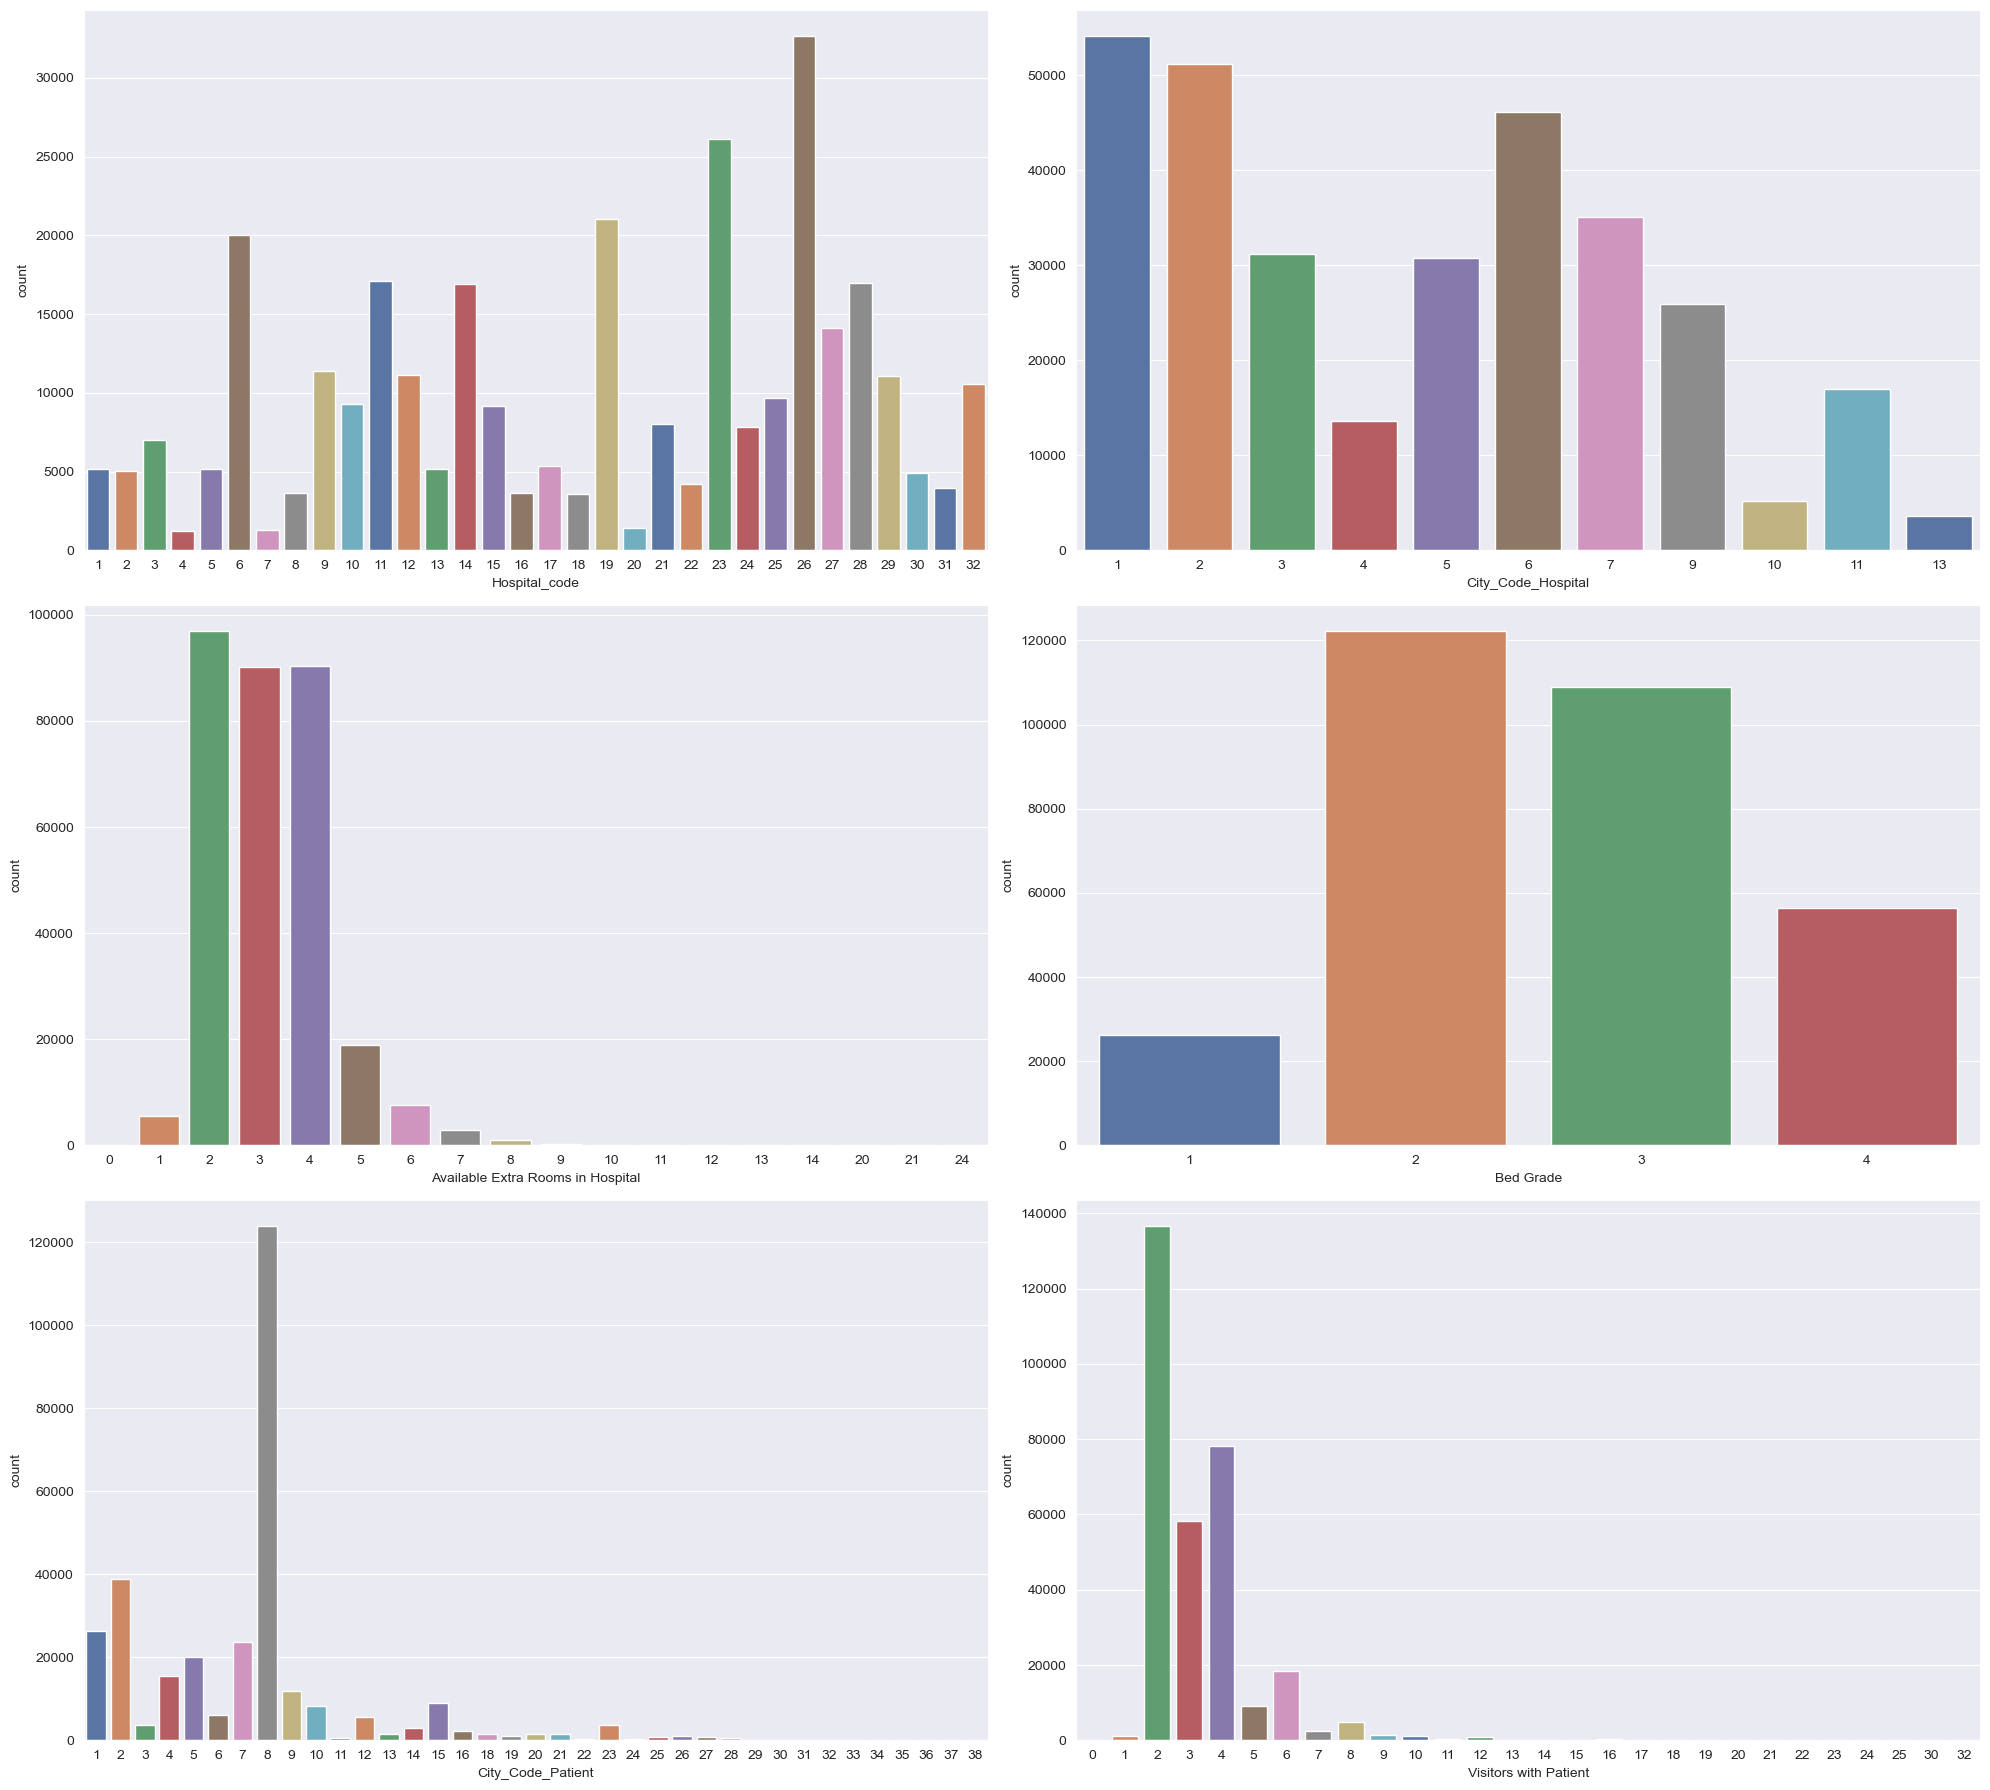

In [47]:
plt.figure(figsize=(20,18))
j=1
for i,columns in enumerate(num_cat_col):
    plt.subplot(3,2,j)
    sns.countplot(x=columns,data=df,palette='deep')
    j+=1
plt.tight_layout()

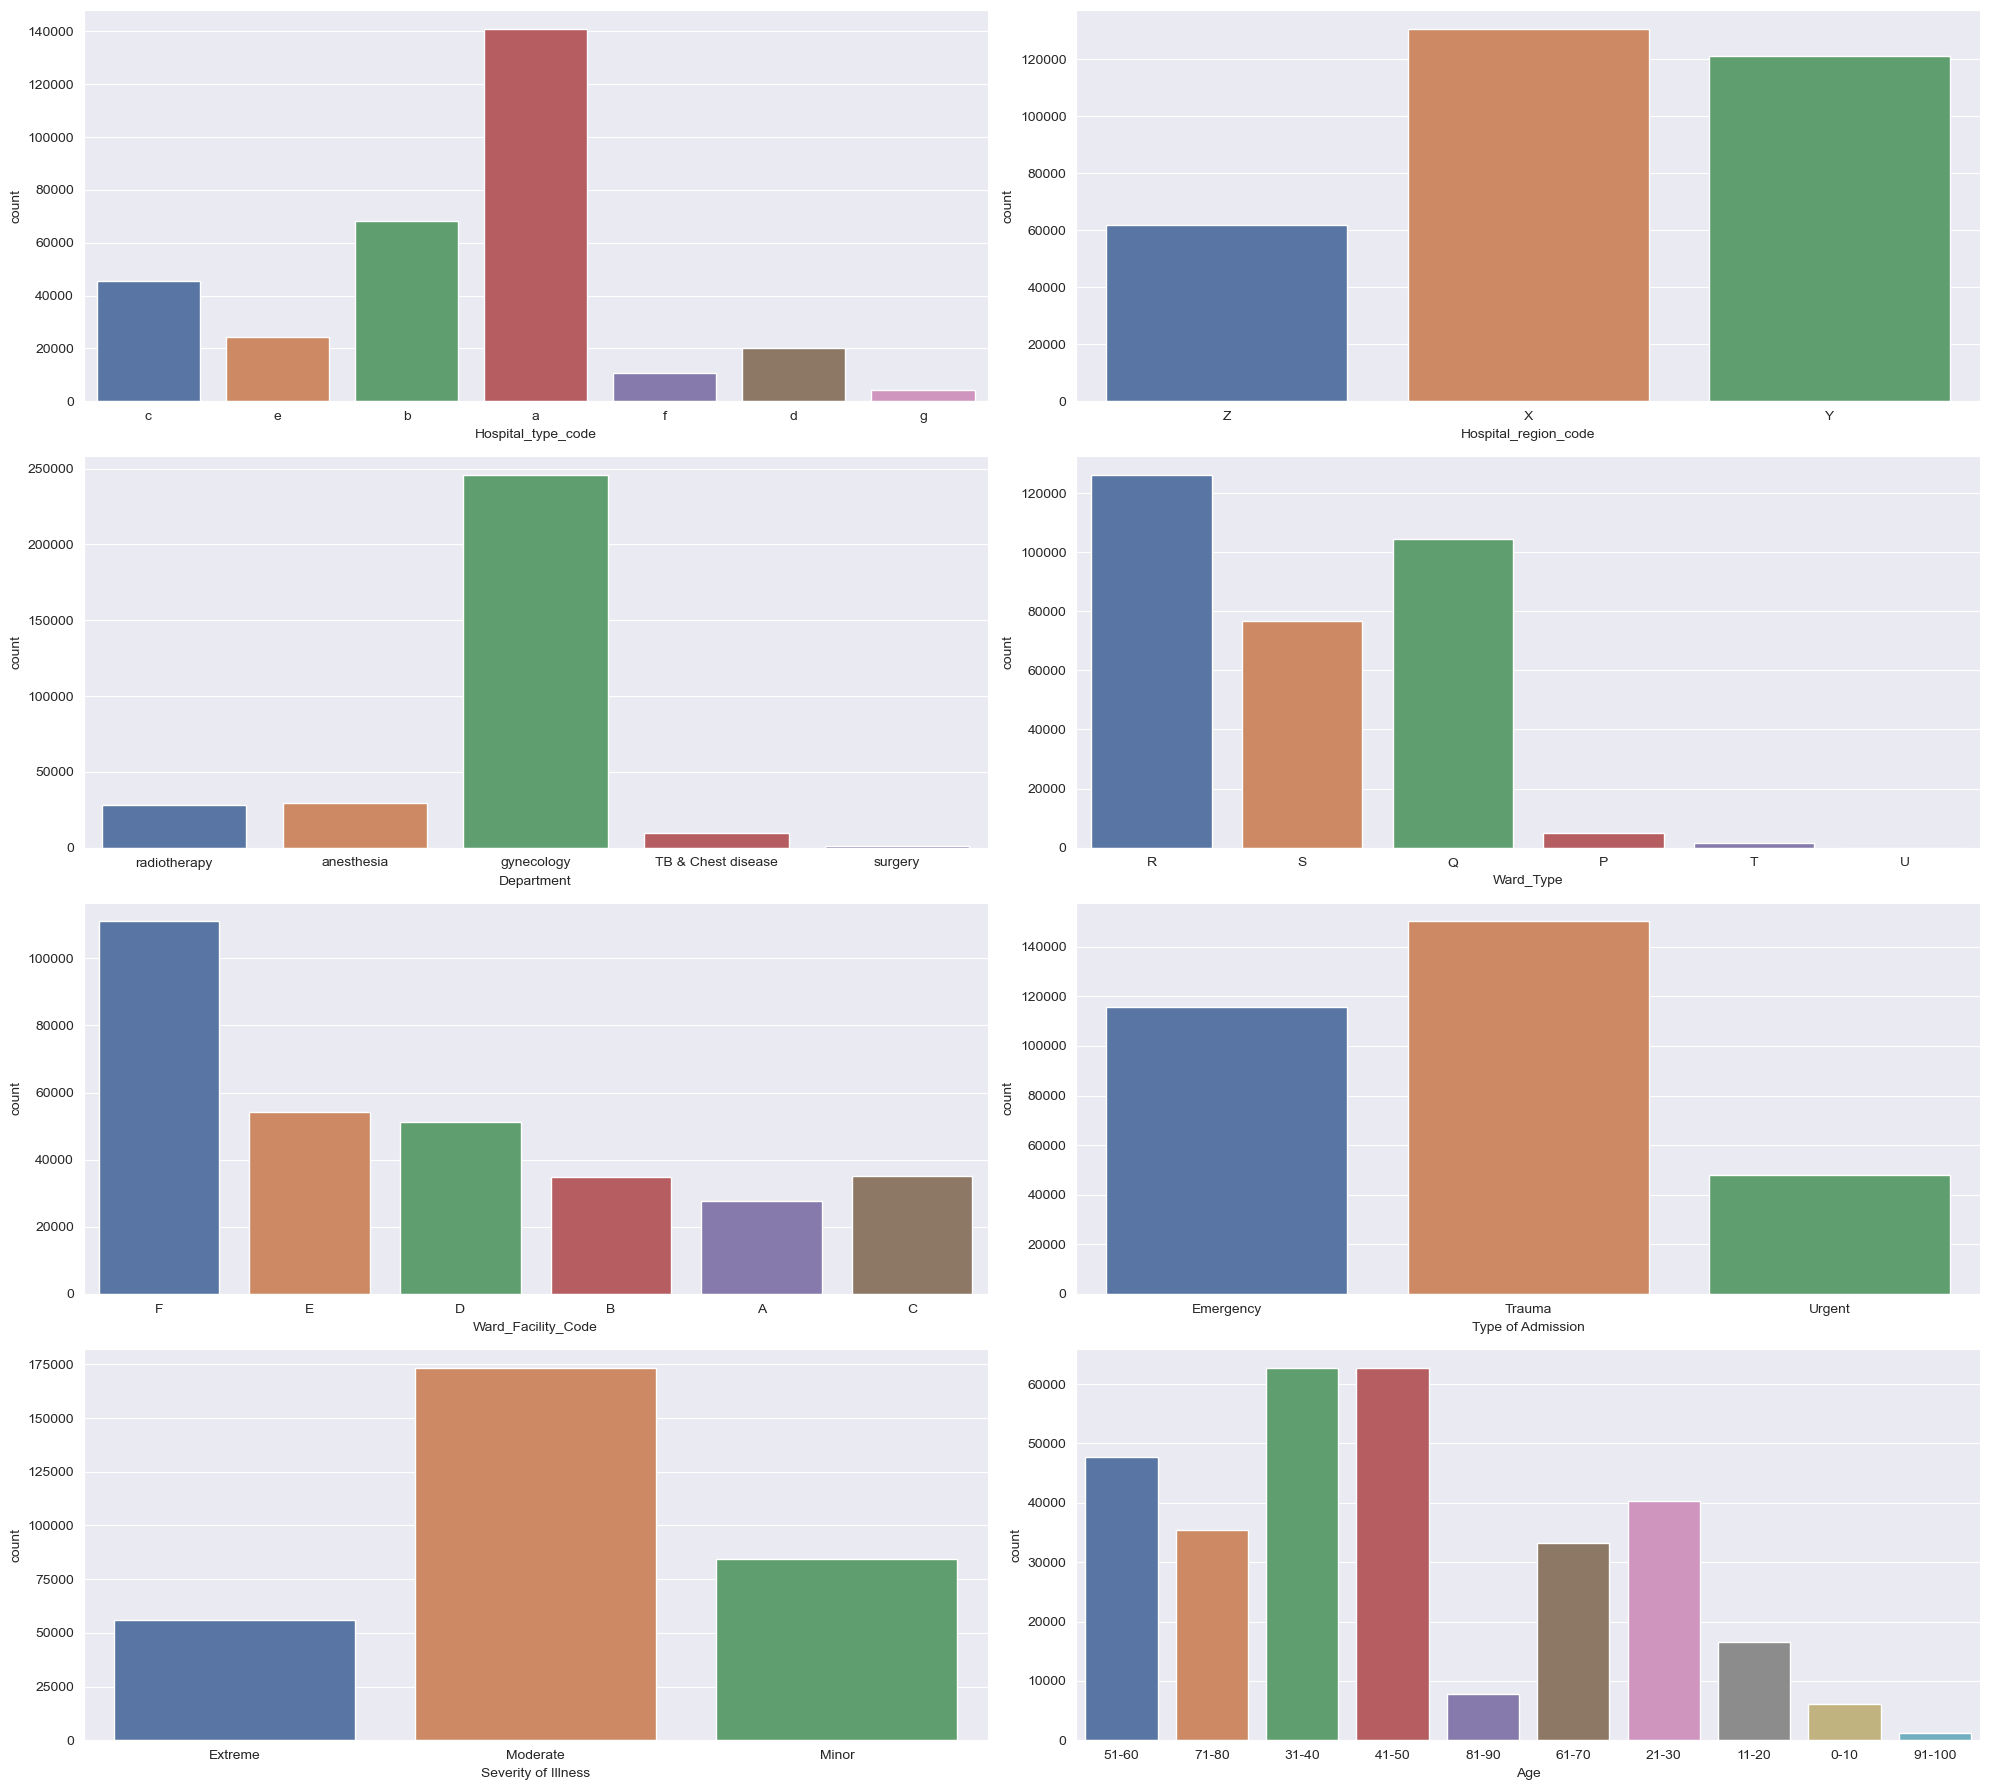

In [48]:
plt.figure(figsize=(20,18))
j=1
for i,columns in enumerate(cat_col):
    plt.subplot(4,2,j)
    sns.countplot(x=columns,data=df,palette='deep')
    j+=1
plt.tight_layout()

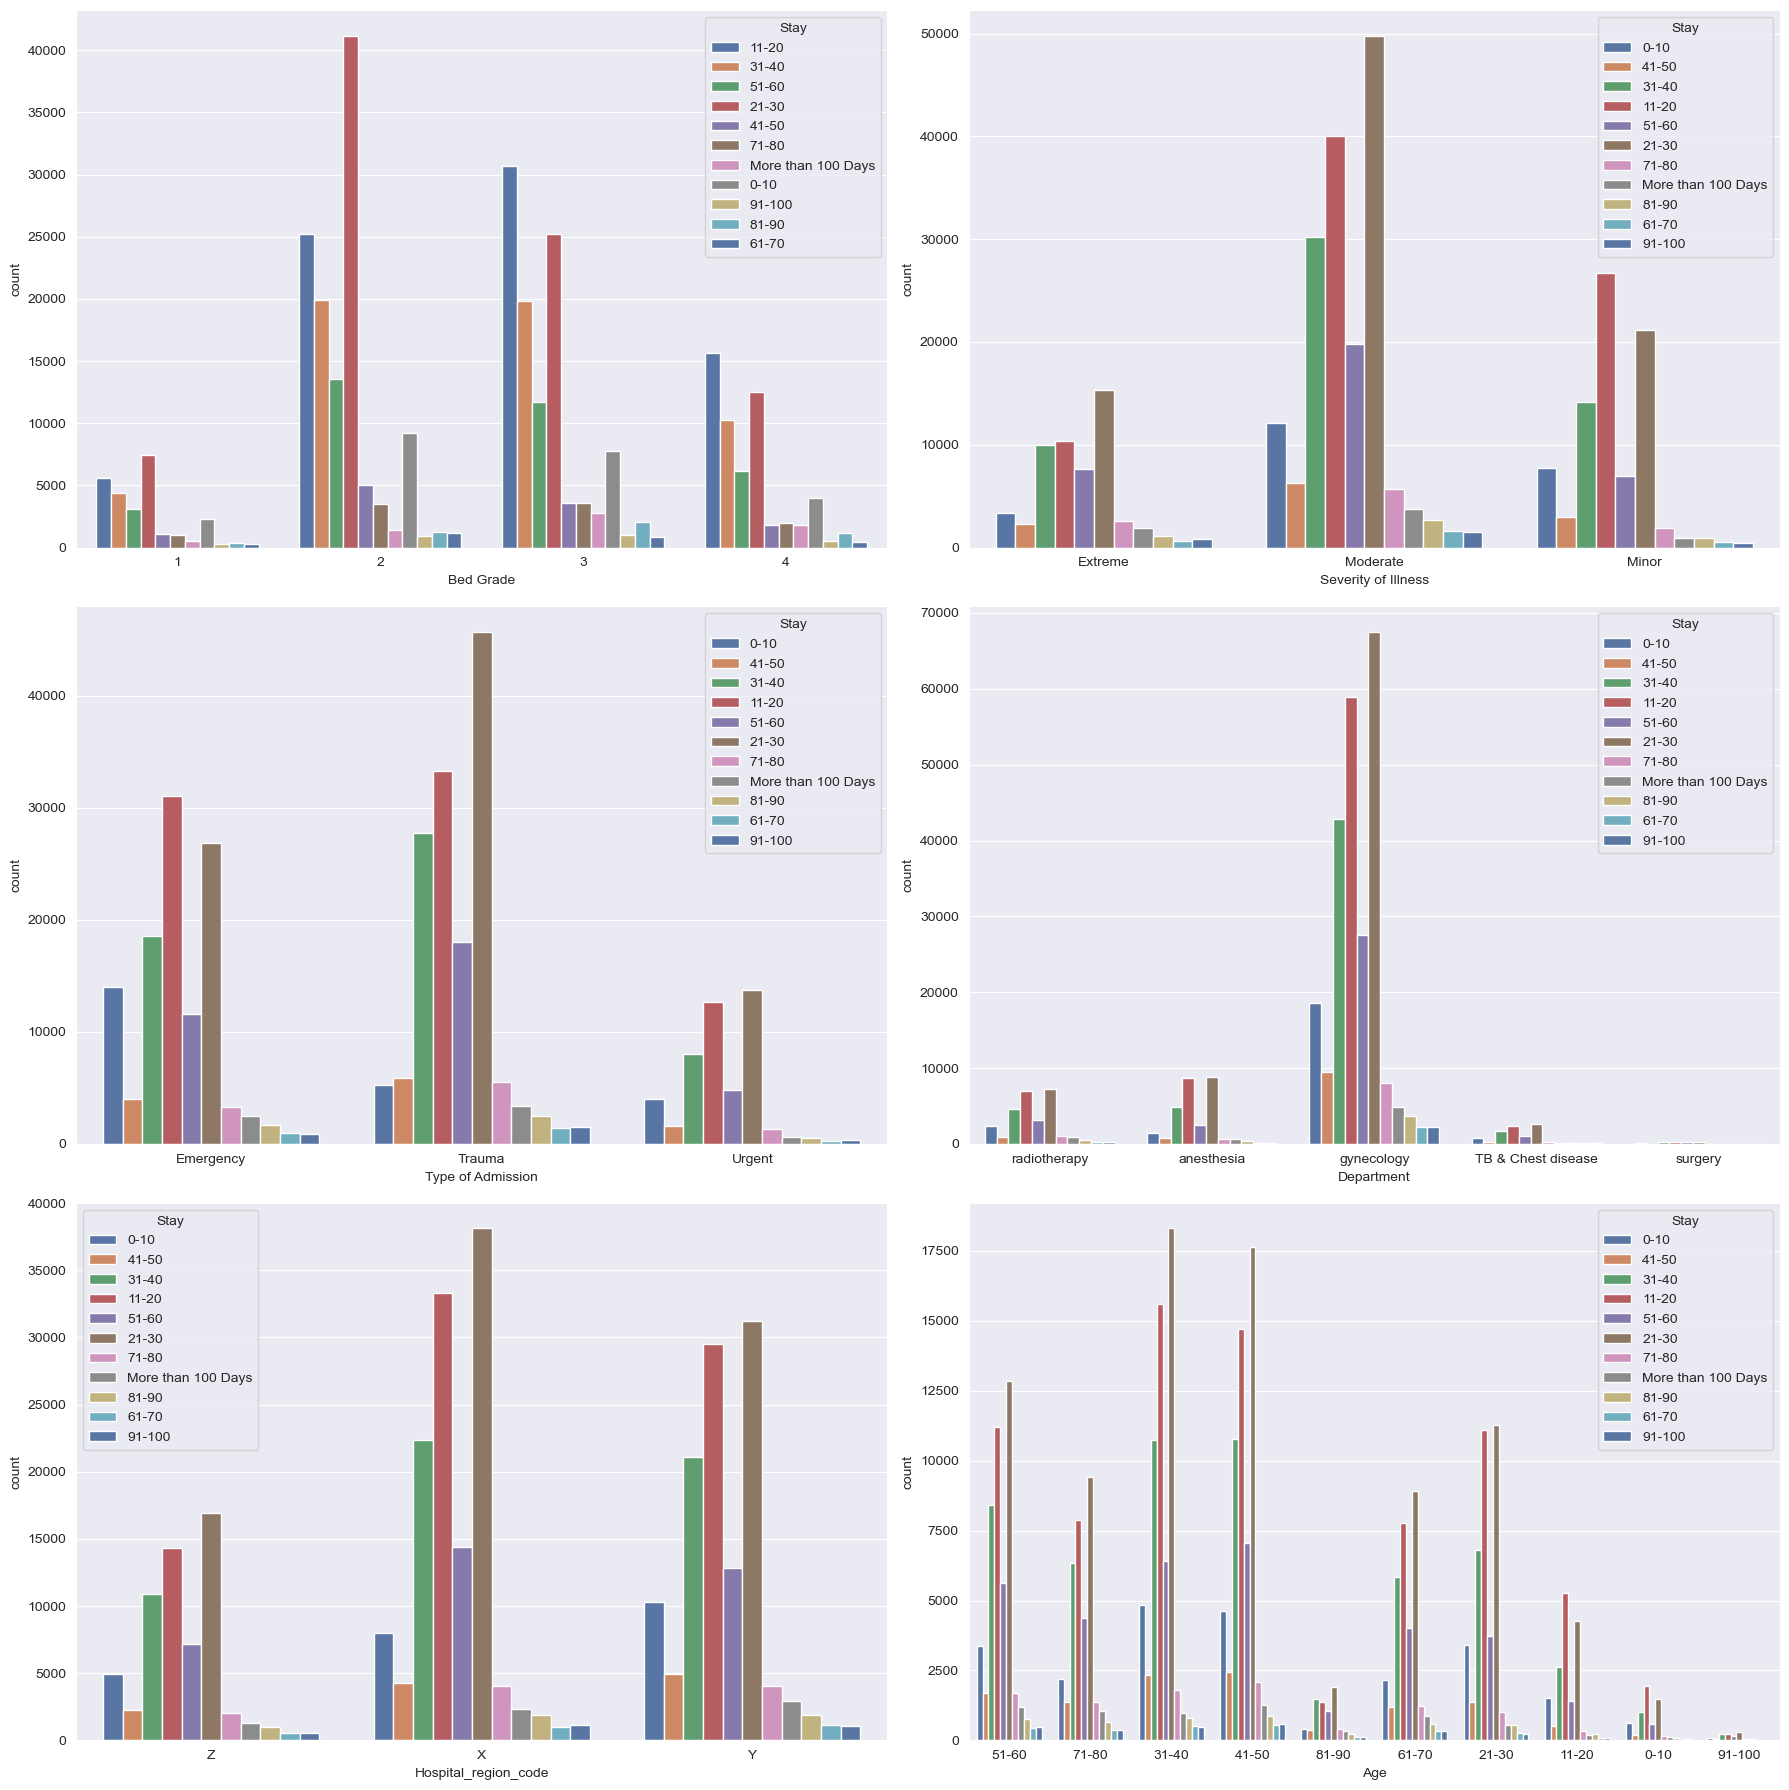

In [49]:
plt.figure(figsize=(18,18))
j=1
for i,columns in enumerate(['Bed Grade','Severity of Illness','Type of Admission','Department','Hospital_region_code','Age']):
    plt.subplot(3,2,j)
    sns.countplot(x=columns,data=df,palette='deep',hue=target)
    j+=1
plt.tight_layout()

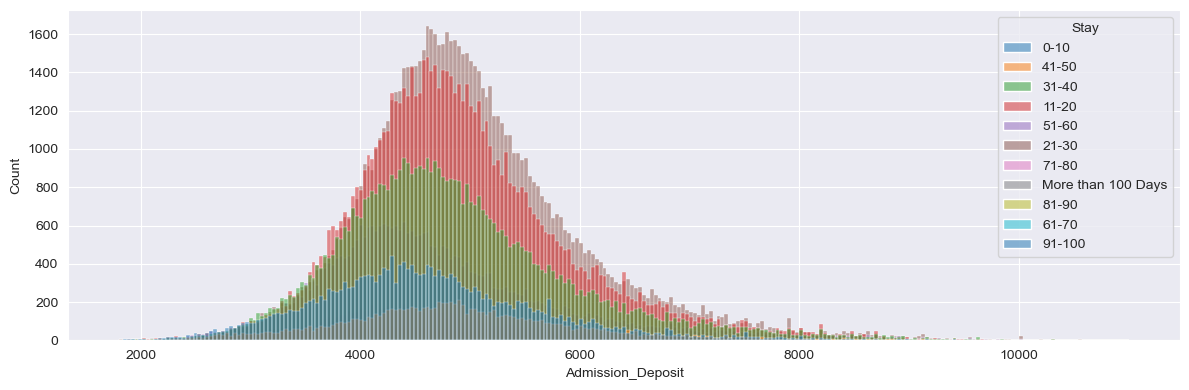

In [50]:
plt.figure(figsize=(12,4))
sns.histplot(x=num_col[0],hue=target,data=df,palette='tab10')
plt.tight_layout()

# Data preprocess pipeline

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313793 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      313793 non-null  int64  
 1   Hospital_type_code                 313793 non-null  object 
 2   City_Code_Hospital                 313793 non-null  int64  
 3   Hospital_region_code               313793 non-null  object 
 4   Available Extra Rooms in Hospital  313793 non-null  int64  
 5   Department                         313793 non-null  object 
 6   Ward_Type                          313793 non-null  object 
 7   Ward_Facility_Code                 313793 non-null  object 
 8   Bed Grade                          313793 non-null  int64  
 9   City_Code_Patient                  313793 non-null  int64  
 10  Type of Admission                  313793 non-null  object 
 11  Severity of Illness                313793 no

In [52]:
y_oh=OneHotEncoder()
l_eh=LabelEncoder()

oh=OneHotEncoder(handle_unknown='ignore')
ms,ss=MinMaxScaler(),StandardScaler()

ct=ColumnTransformer([
                        ('cat_encoder',oh,cat_col),
                        ('num_encoder',ms,num_col) ],
                        remainder='passthrough',n_jobs=-1)

ct

import joblib

joblib.dump(ct, 'column_transformer.joblib')

['column_transformer.joblib']

# Separate X and Y

In [53]:
X=df.drop([target],axis=1)
y=df[[target]]
X.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,8,c,3,Z,3,radiotherapy,R,F,2,7,Emergency,Extreme,2,51-60,4911.0
1,2,c,5,Z,2,radiotherapy,S,F,2,7,Trauma,Extreme,2,51-60,5954.0


In [54]:
y.head(2)

,Stay
0,0-10
1,41-50


# Train Test Split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,stratify=y_train,random_state=42)

In [56]:
X_train.shape,y_train.shape

((254171, 15), (254171, 1))

In [57]:
X_test.shape,y_test.shape

((31380, 15), (31380, 1))

In [58]:
X_test.head(2)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
28209,29,a,4,X,2,gynecology,S,F,1,9,Trauma,Extreme,4,71-80,5201.0
250796,29,a,4,X,2,anesthesia,R,F,2,25,Emergency,Moderate,2,61-70,5655.0


In [59]:
y_test.head(2)

,Stay
28209,71-80
250796,11-20


# Data Preprocess

## **X related processing**

In [60]:
X_train=ct.fit_transform(X_train)
X_val=ct.fit_transform(X_val)
X_test=ct.transform(X_test)

In [61]:
print("-"*50)
for i in ct.transformers_:
    print(i)
    if(i[0]!='remainder'):
        print(i[1].get_feature_names_out())   
    print("-"*50)

--------------------------------------------------
('cat_encoder', OneHotEncoder(handle_unknown='ignore'), ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age'])
['Hospital_type_code_a' 'Hospital_type_code_b' 'Hospital_type_code_c'
 'Hospital_type_code_d' 'Hospital_type_code_e' 'Hospital_type_code_f'
 'Hospital_type_code_g' 'Hospital_region_code_X' 'Hospital_region_code_Y'
 'Hospital_region_code_Z' 'Department_TB & Chest disease'
 'Department_anesthesia' 'Department_gynecology' 'Department_radiotherapy'
 'Department_surgery' 'Ward_Type_P' 'Ward_Type_Q' 'Ward_Type_R'
 'Ward_Type_S' 'Ward_Type_T' 'Ward_Type_U' 'Ward_Facility_Code_A'
 'Ward_Facility_Code_B' 'Ward_Facility_Code_C' 'Ward_Facility_Code_D'
 'Ward_Facility_Code_E' 'Ward_Facility_Code_F'
 'Type of Admission_Emergency' 'Type of Admission_Trauma'
 'Type of Admission_Urgent' 'Severity of Illness_Extreme'
 'Severity of Illness_Minor' 'Sever

In [62]:
ct

,transformers,"[('cat_encoder', ...), ('num_encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


## **Y related processing**

In [63]:
y_train.value_counts()

Stay              
21-30                 69915
11-20                 62446
31-40                 43993
51-60                 27915
0-10                  18833
41-50                  9348
71-80                  8177
More than 100 Days     5304
81-90                  3857
91-100                 2198
61-70                  2185
Name: count, dtype: int64

In [64]:
y_oh.fit(y_train)
output_shape=len(y_oh.get_feature_names_out())

y_train_copy=l_eh.fit_transform(y_train)
y_val_copy=l_eh.transform(y_val)
y_test_copy=l_eh.transform(y_test)

y_train_tf_copy = tf.keras.utils.to_categorical(y_train_copy, num_classes=output_shape)
y_val_tf_copy = tf.keras.utils.to_categorical(y_val_copy, num_classes=output_shape)
y_test_tf_copy = tf.keras.utils.to_categorical(y_test_copy, num_classes=output_shape)

In [65]:
dict(enumerate(l_eh.classes_))

{0: '0-10',
 1: '11-20',
 2: '21-30',
 3: '31-40',
 4: '41-50',
 5: '51-60',
 6: '61-70',
 7: '71-80',
 8: '81-90',
 9: '91-100',
 10: 'More than 100 Days'}

In [66]:
X_train.shape,y_train.shape

((254171, 50), (254171, 1))

In [67]:
X_test.shape,y_test.shape

((31380, 50), (31380, 1))

In [68]:
tup1=None;tup2=None
try:
    tup1=(X_test[0].toarray(),y_test_tf_copy[0]) 
    print("Sparse Matrix to Dense Array")
except:
    tup2=(X_test[0],y_test_tf_copy[0]) 
    print("Normal Matrix to Dense Array")

tup1 if(tup1) else tup2

Normal Matrix to Dense Array


(array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.38016622, 29.        ,
         4.        ,  2.        ,  1.        ,  9.        ,  4.        ]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]))

# Tensorflow batch settings

In [69]:
batch_size=1024

In [70]:
# def convert_sparse_matrix_to_sparse_tensor(X):
#     coo = X.tocoo()
#     indices = np.mat([coo.row, coo.col]).transpose()
#     return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))

# X_train=convert_sparse_matrix_to_sparse_tensor(X_train)
# X_val=convert_sparse_matrix_to_sparse_tensor(X_val)
# X_test=convert_sparse_matrix_to_sparse_tensor(X_test)

In [71]:
data_tf_tr=tf.data.Dataset.from_tensor_slices((X_train, y_train_tf_copy))
data_train_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_val=tf.data.Dataset.from_tensor_slices((X_val, y_val_tf_copy))
data_val_batches = data_tf_val.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_te=tf.data.Dataset.from_tensor_slices((X_test, y_test_tf_copy))
data_test_x_y_batches = data_tf_te.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

In [72]:
#Only for X_test
data_tf_tre=tf.data.Dataset.from_tensor_slices(X_test)
data_test_x_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Model fitting

## Neural Network Settings

In [73]:
n,m=5,4

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,PReLU,LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

l_relu=LeakyReLU()
para_relu = PReLU()
e=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)

In [75]:
y_train_tf_copy.shape

(254171, 11)

In [76]:
input_shape_val=X_train.shape[1]
X_train.shape,input_shape_val

((254171, 50), 50)

In [77]:
model=Sequential()

#Input Layer
model.add(Input(shape=(input_shape_val,)))

#Hidden Layer
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation='relu'))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))
model.add(Dense((m*n)*input_shape_val , activation=para_relu ))

#Output Layer
model.add(Dense(output_shape,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics = [ 'accuracy',
                         tf.keras.metrics.AUC(name='AUC_ROC',curve='ROC',num_thresholds=10000) ,
                         tf.metrics.F1Score(name='F1_Score',average='macro',threshold=0.5)
                        ]
             )

In [78]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        51,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │        11,011 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,066,011 (15.51 MB)

 Trainable params: 4,066,011 (15.51 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True,show_dtype=True,show_layer_activations=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [80]:
# This uses the y_train_copy (LabelEncoded)
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_copy),
    y=y_train_copy
)

# Convert the weights into a dictionary that Keras understands
class_weight_dict = dict(enumerate(class_weights))

print("Class weights to be used by the model:")
print(class_weight_dict)

Class weights to be used by the model:
{0: 1.226913107070278, 1: 0.37002297257557804, 2: 0.33049352135385174, 3: 0.525230253573399, 4: 2.4718072898432335, 5: 0.8277433116766808, 6: 10.575036405242354, 7: 2.8257862963745315, 8: 5.990784170457491, 9: 10.512490694019357, 10: 4.35642054024407}


In [81]:
%%time
history=model.fit(data_train_batches,epochs=200,callbacks=[e,reduce_lr],
                  validation_data=data_val_batches,verbose=1, class_weight=class_weight_dict)

Epoch 1/200
 77/249 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - AUC_ROC: 0.5528 - F1_Score: 2.8796e-06 - accuracy: 0.0812 - loss: 2.3611CPU times: user 23.8 s, sys: 3.07 s, total: 26.9 s
Wall time: 3.54 s


KeyboardInterrupt: 

# Testing

In [ ]:
model.evaluate(data_test_x_y_batches)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - AUC_ROC: 0.8039 - F1_Score: 0.0585 - accuracy: 0.2643 - loss: 1.8879


[1.887877345085144,
 0.264340341091156,
 0.8039071559906006,
 0.058458443731069565]

In [ ]:
score_dict={};j=0

In [ ]:
def tester_func(model_list,X_test,y_test):
    for i,clf in enumerate(model_list):
       
        pred_proba=None;pred=None
        clf_name = clf.__class__.__name__

        try:
            pred_proba=clf.predict(X_test)
            pred=np.argmax(clf.predict(X_test), axis=-1)
        except NotFittedError as e:
            raise(e)

        print("-"*80)
        print(f"Predicting {clf_name} done")
        
        if(str(df[target].dtype)!='object'):
            print("Non object mode testing .........")
            score_dict[clf_name]={
                'roc_auc_score':roc_auc_score(y_test.values,pred_proba,multi_class='ovr'),
                'f1_score':f1_score(y_test.values,pred,average='macro'),
                'accuracy_score':accuracy_score(y_test.values,pred),
                'model_index':int(i)
            }
            
        else:
            print("Object mode testing .........")
            score_dict[clf_name]={
                'roc_auc_score':roc_auc_score(y_test,pred_proba,multi_class='ovr'),
                'f1_score':f1_score(y_test,pred,average='macro'),
                'accuracy_score':accuracy_score(y_test,pred),
                'model_index':int(i)
            }
    
        j=i
    
    print("-"*80)
    return j

In [ ]:
indexer=tester_func([model],X_test,y_test_copy)

981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
981/981 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
--------------------------------------------------------------------------------
Predicting Sequential done
Object mode testing .........
--------------------------------------------------------------------------------


In [ ]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values('f1_score',ascending=False)
score_pd

,roc_auc_score,f1_score,accuracy_score,model_index
Sequential,0.781351,0.225077,0.26434,0.0


# Confusion matrix for Top model

In [ ]:
prediction=np.argmax(model.predict(X_test), axis=-1)
prediction=l_eh.inverse_transform(prediction)

981/981 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
print(classification_report( y_test.values , prediction ))

                    precision    recall  f1-score   support

              0-10       0.19      0.61      0.29      2325
             11-20       0.44      0.27      0.33      7710
             21-30       0.48      0.29      0.36      8632
             31-40       0.47      0.08      0.14      5431
             41-50       0.08      0.19      0.11      1154
             51-60       0.37      0.26      0.31      3446
             61-70       0.02      0.21      0.03       270
             71-80       0.13      0.09      0.11      1010
             81-90       0.20      0.63      0.31       476
            91-100       0.05      0.42      0.09       271
More than 100 Days       0.51      0.33      0.40       655

          accuracy                           0.26     31380
         macro avg       0.27      0.31      0.23     31380
      weighted avg       0.40      0.26      0.28     31380



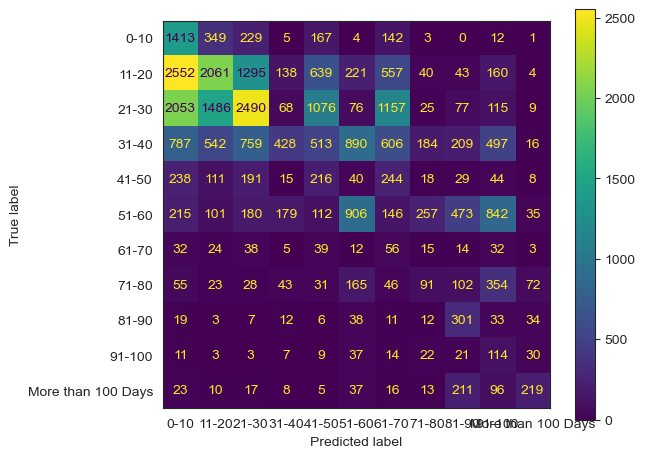

In [ ]:
sns.set_style('white')
ConfusionMatrixDisplay.from_predictions( y_test.values , prediction )
plt.tight_layout()

# Submission

In [ ]:
test_df=pd.read_csv(path +'/healthcare/test_data.csv')
id_col=test_df['case_id']
test_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [ ]:
test_df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [ ]:
test_df.drop(col_drop_list,axis=1,inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      137057 non-null  int64  
 1   Hospital_type_code                 137057 non-null  object 
 2   City_Code_Hospital                 137057 non-null  int64  
 3   Hospital_region_code               137057 non-null  object 
 4   Available Extra Rooms in Hospital  137057 non-null  int64  
 5   Department                         137057 non-null  object 
 6   Ward_Type                          137057 non-null  object 
 7   Ward_Facility_Code                 137057 non-null  object 
 8   Bed Grade                          137022 non-null  float64
 9   City_Code_Patient                  134900 non-null  float64
 10  Type of Admission                  137057 non-null  object 
 11  Severity of Illness                1370

In [ ]:
X_test_df=test_df.copy()
X_test_df=ct.transform(X_test_df)

In [ ]:
pred=np.argmax(model.predict(X_test_df), axis=-1)
pred=l_eh.inverse_transform(pred)

4284/4284 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [ ]:
sub_demo=pd.read_csv(path +'/healthcare/sample_sub.csv')
sub_demo.head()

,case_id,Stay
0,318439,0-10
1,318440,0-10
2,318441,0-10
3,318442,0-10
4,318443,0-10


In [ ]:
sub=pd.DataFrame(data={sub_demo.columns.values[0]:id_col,sub_demo.columns.values[1]:pred.ravel()})
sub

,case_id,Stay
0,318439,0-10
1,318440,91-100
2,318441,61-70
3,318442,21-30
4,318443,51-60
...,...,...
137052,455491,0-10
137053,455492,0-10
137054,455493,11-20
137055,455494,11-20


In [ ]:
sub.to_csv('submission.csv',index=False)

In [ ]:
model.save('model.h5')

In [ ]:
model.save('model.keras')

In [ ]:
ct
joblib.dump(ct, 'column_transformer.joblib')

['column_transformer.joblib']

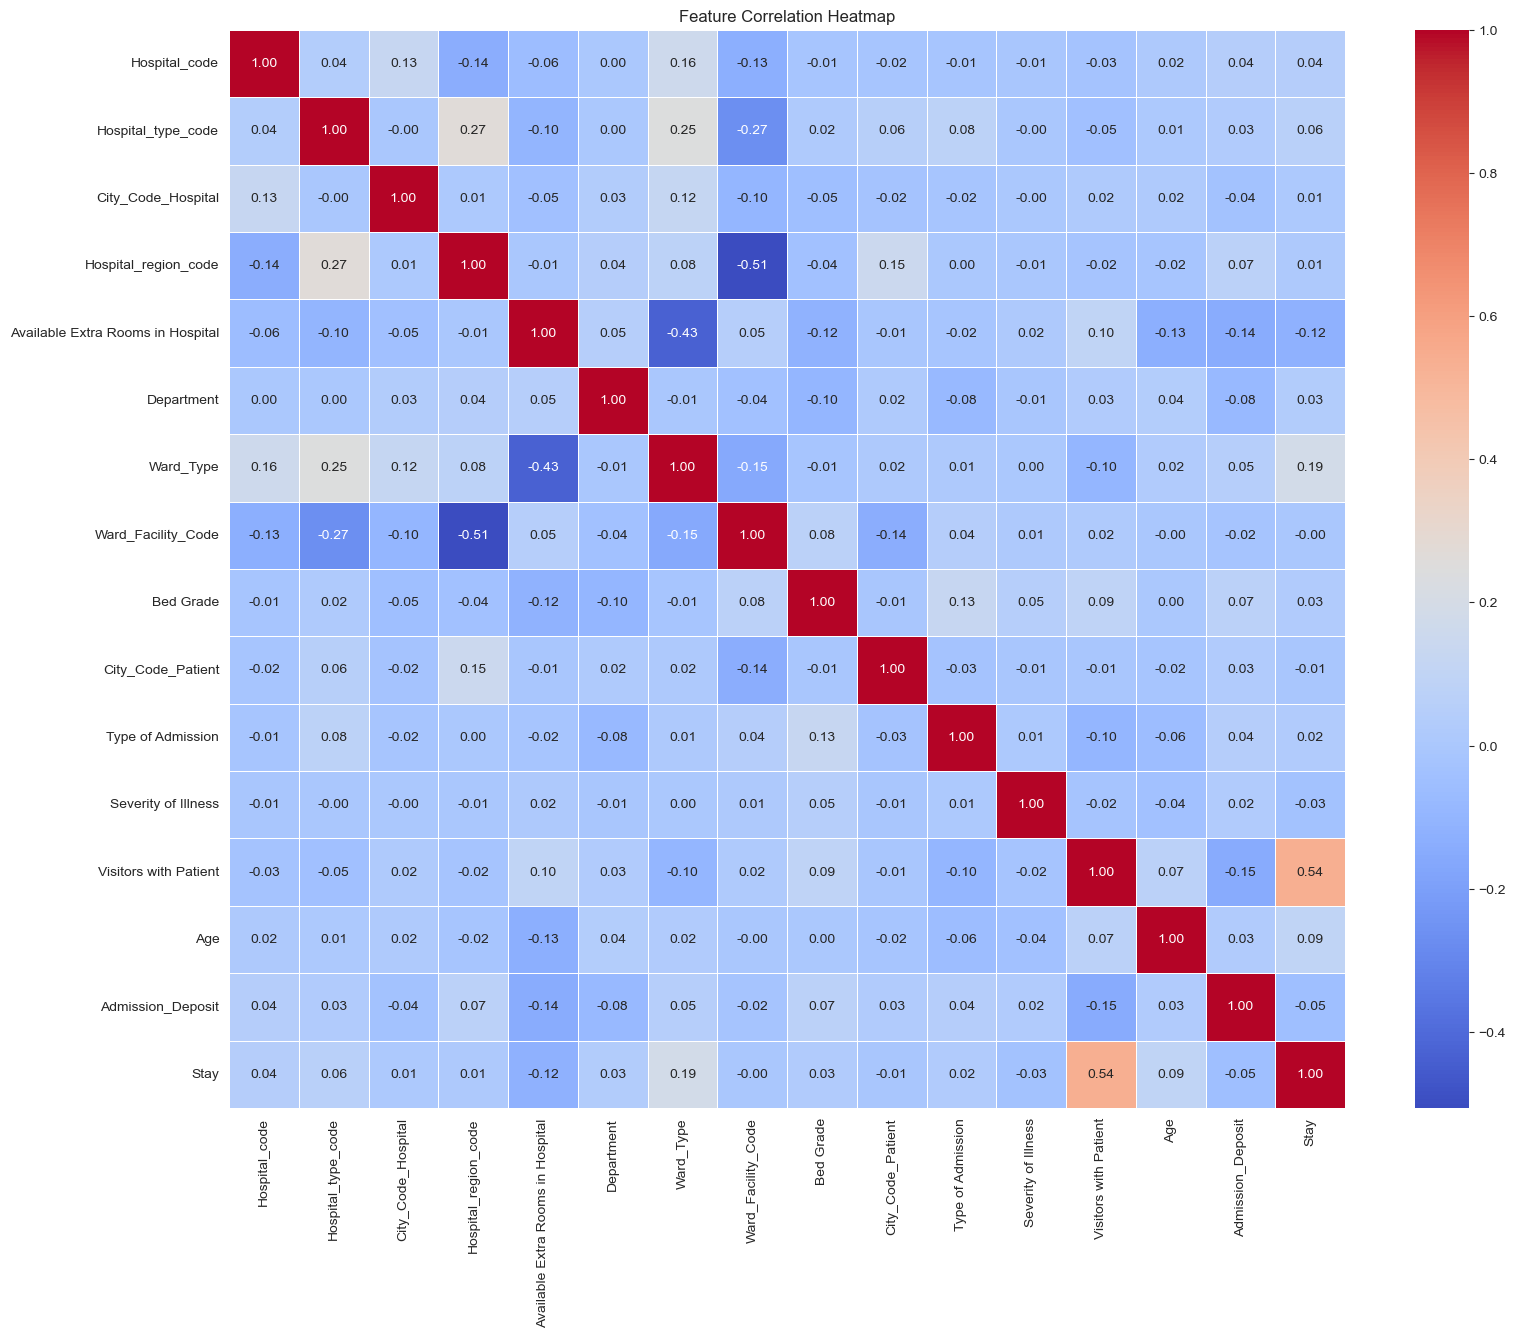


--- Correlation with 'Stay' ---
Stay                                 1.000000
Visitors with Patient                0.537476
Ward_Type                            0.185755
Age                                  0.093955
Hospital_type_code                   0.058973
Hospital_code                        0.042894
Department                           0.032712
Bed Grade                            0.025056
Type of Admission                    0.024232
Hospital_region_code                 0.012002
City_Code_Hospital                   0.006626
Ward_Facility_Code                  -0.004777
City_Code_Patient                   -0.009779
Severity of Illness                 -0.031346
Admission_Deposit                   -0.052092
Available Extra Rooms in Hospital   -0.121564
Name: Stay, dtype: float64


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# 2. Create a copy and encode all 'object' (text) columns to numeric values
df_corr = df.copy()
le = LabelEncoder()

for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = le.fit_transform(df_corr[col])

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(18, 14))
corr_matrix = df_corr.corr()
sns.heatmap(
    corr_matrix, 
    annot=True,          # Show the correlation values on the map
    fmt='.2f',           # Format values to 2 decimal places
    cmap='coolwarm',     # Use a color-blind friendly color map
    linewidths=.5
)
plt.title('Feature Correlation Heatmap')
plt.show()

# 4. (Optional) Print the correlations with 'Stay' in a sorted list
print("\n--- Correlation with 'Stay' ---")
stay_correlation = corr_matrix['Stay'].sort_values(ascending=False)
print(stay_correlation)

Mutual Information scores (how much each feature tells us about 'Stay'):

Visitors with Patient                0.174819
Admission_Deposit                    0.137487
Ward_Type                            0.028775
Hospital_code                        0.027650
Type of Admission                    0.015538
Available Extra Rooms in Hospital    0.014055
City_Code_Hospital                   0.012939
Ward_Facility_Code                   0.011392
Bed Grade                            0.010696
Severity of Illness                  0.010307
Hospital_type_code                   0.008457
City_Code_Patient                    0.006714
Age                                  0.005624
Department                           0.002539
Hospital_region_code                 0.001925
dtype: float64


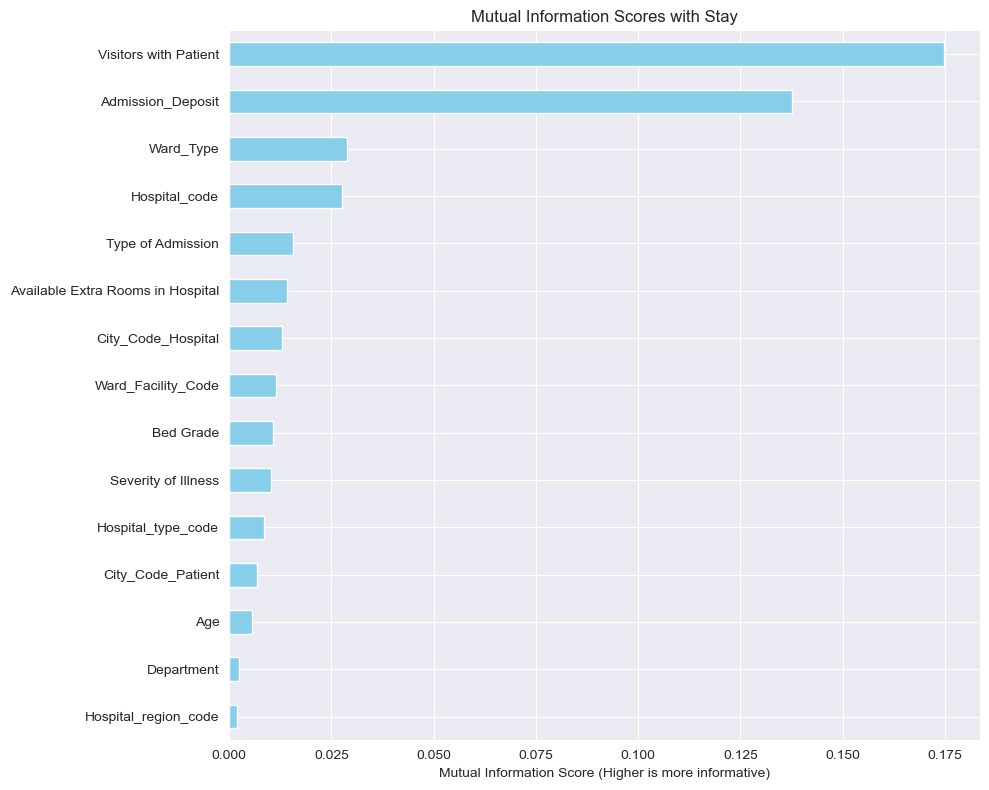

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import warnings
import numpy as np


# Encode all categorical (object) columns to numeric
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col])

# Handle NaNs in Bed Grade and City_Code_Patient (filling with median)
df_encoded['Bed Grade'] = df_encoded['Bed Grade'].fillna(df_encoded['Bed Grade'].median())
df_encoded['City_Code_Patient'] = df_encoded['City_Code_Patient'].fillna(df_encoded['City_Code_Patient'].median())

# --- Mutual Information Calculation ---

# Separate features (X) and target (y)
# Drop unique identifiers that are not predictive
X = df_encoded.drop(columns=['Stay', 'case_id', 'patientid'])
y = df_encoded['Stay'] # The target variable

# Calculate mutual information scores
# discrete_features=True is suitable here as we are treating the label-encoded 
# categorical and ordinal variables as discrete
mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=42)

# Create a Series for easy viewing and sorting
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series_sorted = mi_series.sort_values(ascending=False)

print("Mutual Information scores (how much each feature tells us about 'Stay'):\n")
print(mi_series_sorted)

# --- Visualization ---

plt.figure(figsize=(10, 8))
mi_series_sorted.plot(kind='barh', title='Mutual Information Scores with Stay', color='skyblue')
plt.xlabel('Mutual Information Score (Higher is more informative)')
plt.gca().invert_yaxis() # Put the highest score at the top
plt.tight_layout()
plt.savefig("mutual_information_scores_final.png")
plt.show()